In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:

from keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [2]:
train_df = pd.read_csv('../input/heartbeat/mitbih_train.csv', header=None)
test_df = pd.read_csv('../input/heartbeat/mitbih_test.csv', header= None)

In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
print(train_df[label_col].value_counts())

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [6]:
label_col = train_df.columns[187] 
data_0 = train_df[train_df[label_col] == 0]
data_1 = train_df[train_df[label_col] == 1]
data_2 = train_df[train_df[label_col] == 2]
data_3 = train_df[train_df[label_col] == 3]
data_4 = train_df[train_df[label_col] == 4]

data_1_resample = resample(data_1, n_samples=2000, random_state=42, replace=True)
data_2_resample = resample(data_2, n_samples=2000, random_state=42, replace=True)
data_3_resample = resample(data_3, n_samples=2000, random_state=42, replace=True)
data_4_resample = resample(data_4, n_samples=2000, random_state=42, replace=True)
data_0_sample = data_0.sample(n=2000, random_state=42)

balanced_train_df = pd.concat([data_0_sample, data_1_resample, data_2_resample, data_3_resample, data_4_resample])
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [10]:

print("Balanced dataset shape:", balanced_train_df.shape)

Balanced dataset shape: (10000, 188)


In [11]:
balanced_train_df[label_col].value_counts()

187
3.0    2000
2.0    2000
0.0    2000
1.0    2000
4.0    2000
Name: count, dtype: int64

In [8]:
X_train = train_df.drop(label_col, axis=1)
y_train = train_df[label_col]
X_test = test_df.drop(label_col, axis=1)
y_test= test_df[label_col]

In [ ]:
from sklearn.model_selection import train_test_split
label_col = balanced_train_df.columns[187]

X = balanced_train_df.drop(label_col, axis=1)
y = balanced_train_df[label_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)

X_train = np.array(X_train)
X_val = np.array(X_val)


In [13]:
'''
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
'''

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [29]:
print(X_train.shape)
print(y_train.shape)

(87554, 187)
(87554, 5)


In [12]:
print(y_train)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


[0. 0. 0. 0. 1.]


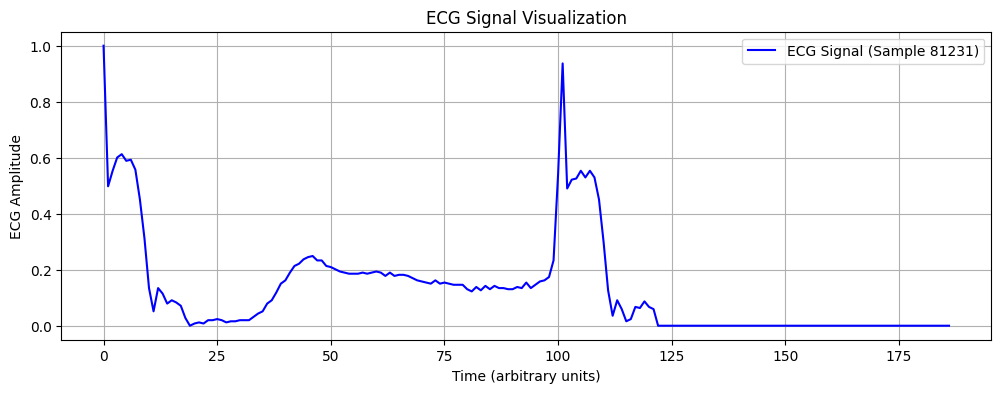

In [12]:
sample_idx = 81231
ecg_signal = X_train.iloc[sample_idx].values
print(y_train[sample_idx])
time = np.arange(len(ecg_signal))

plt.figure(figsize=(12, 4))
plt.plot(time, ecg_signal, label=f'ECG Signal (Sample {sample_idx})', color='b')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ECG Amplitude')
plt.title('ECG Signal Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
X_train= np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [14]:

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:

from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

In [16]:

device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(f"Using device: {device}")

Using device: /GPU:0


In [17]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(187, 1)),  
    Dropout(0.2),
    LSTM(32, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 output classes
]) 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
'''model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(187, 1)),  
    Dropout(0.1),
    LSTM(64, return_sequences=False),  
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax') 
])
'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),verbose=1)


Epoch 1/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8242 - loss: 0.7168 - val_accuracy: 0.8276 - val_loss: 0.6517
Epoch 2/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8276 - loss: 0.6455 - val_accuracy: 0.8269 - val_loss: 0.6789
Epoch 3/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8290 - loss: 0.5901 - val_accuracy: 0.8276 - val_loss: 0.6611
Epoch 4/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8342 - loss: 0.5752 - val_accuracy: 0.8913 - val_loss: 0.3872
Epoch 5/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8902 - loss: 0.3983 - val_accuracy: 0.9068 - val_loss: 0.3500
Epoch 6/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8992 - loss: 0.3796 - val_accuracy: 0.9277 - val_loss: 0.2945
Epoch 7/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9242 - loss: 0.2930 - val_accuracy: 0.9349 - val_loss: 0.2663
Epoch 8/100
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 

In [19]:

model.save('lstm_ecg_model.h5')

In [20]:

y_pred = model.predict(X_test)

y_pred_probs = model.predict(X_test)  
y_pred = np.argmax(y_pred_probs, axis=1) 
y_true = np.argmax(y_test, axis=1)  

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Test Accuracy: 98.20%


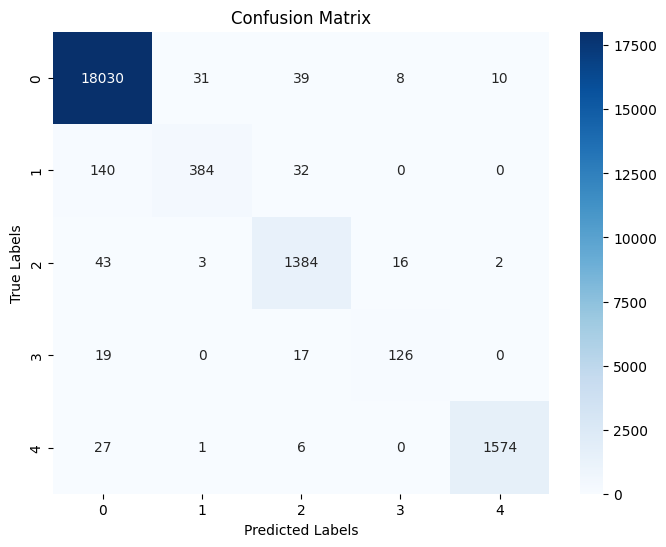

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


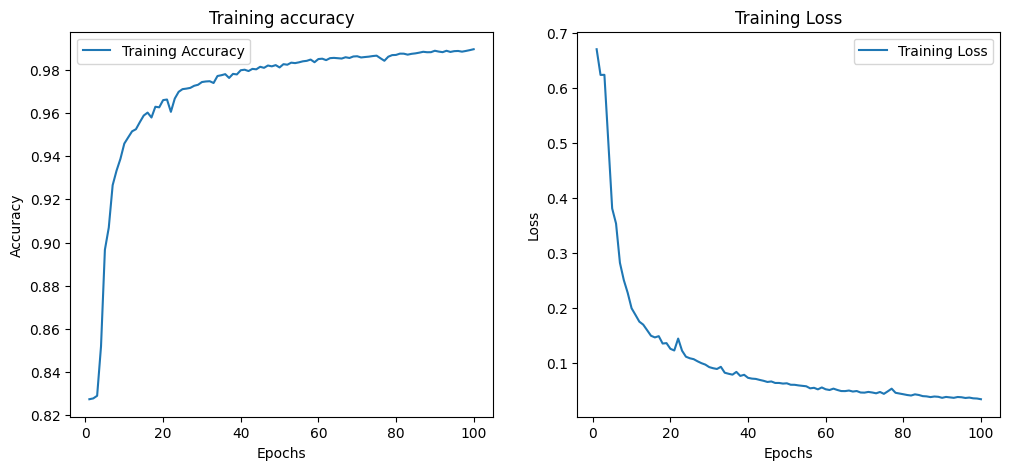

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1) 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss,  label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()


In [25]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True)

for class_label in sorted(report.keys()):
        print(f"Class {class_label}: F1 Score = {report[class_label]['f1-score']:.4f}")


Class 0: F1 Score = 0.9913
Class 1: F1 Score = 0.7877
Class 2: F1 Score = 0.9460
Class 3: F1 Score = 0.8077
Class 4: F1 Score = 0.9856


TypeError: 'float' object is not subscriptable